In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [117]:
df = pd.read_excel('data/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [118]:
df_copy = df.copy()

In [336]:
df = df_copy.copy()

In [337]:
df.shape

(541909, 8)

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [339]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


<div class="alert alert-danger"> Quantity and unit price are negative which they shouldn't be </div>

In [340]:
df['InvoiceDate'].min(), df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [341]:
df['CustomerID'].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
13391.0       1
16579.0       1
13366.0       1
17763.0       1
17846.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [342]:
df['InvoiceNo'].value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
564047        1
564046        1
C547241       1
C540391       1
558724        1
Name: InvoiceNo, Length: 25900, dtype: int64

## Data Cleaning

In [343]:
# Drop CustomerID NaN
df.dropna(subset=['CustomerID', 'Quantity', 'UnitPrice'], inplace=True)

### Remove rows where Qty or Unit Price < 0

In [344]:
df[df['Quantity'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [345]:
df[df['UnitPrice'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [346]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [347]:
df.sort_values(by=['Quantity'], ascending=False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom


### Remove the time from InvoiceDate

In [348]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'].dt.date)

In [349]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


### Check stock codes

In [350]:
df[df['StockCode'].str.isalpha()==True].drop_duplicates(subset=['StockCode'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01,18.000,12583.0,France
2239,536569,M,Manual,1,2010-12-01,1.250,16274.0,United Kingdom
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15,0.001,13952.0,United Kingdom
317507,564764,DOT,DOTCOM POSTAGE,1,2011-08-30,11.170,14096.0,United Kingdom


In [351]:
#I do not want POSTAGE or Manual or DOTCOM POSTAGE
df = df[~df['StockCode'].isin(['POST', 'M', 'DOT'])]

In [352]:
df.shape

(396485, 8)

## EDA

### Plot  Number of items over time by Quantity

In [361]:
df.sort_values(by=['Quantity'], ascending=False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346.0,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27,0.21,12901.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27,0.72,13135.0,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22,0.82,18087.0,United Kingdom


<div class="alert alert-danger"> Since there are 2 transactions which are outliers in terms of quantity -- we will be ignoring them for our chart </div>

In [376]:
qty_date = df[df['Quantity']<70000]

In [377]:
qty_date['InvoiceDay'] = qty_date['InvoiceDate'].apply(lambda x: x.strftime('%m-%d'))
qty_date['InvoiceDay'] = pd.to_datetime(qty_date['InvoiceDay'], format='%m-%d')

<ipython-input-377-989ce1caa3cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qty_date['InvoiceDay'] = qty_date['InvoiceDate'].apply(lambda x: x.strftime('%m-%d'))
<ipython-input-377-989ce1caa3cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qty_date['InvoiceDay'] = pd.to_datetime(qty_date['InvoiceDay'], format='%m-%d')


In [378]:
qty_date = qty_date.groupby(['InvoiceDay'])['Quantity'].sum().reset_index()

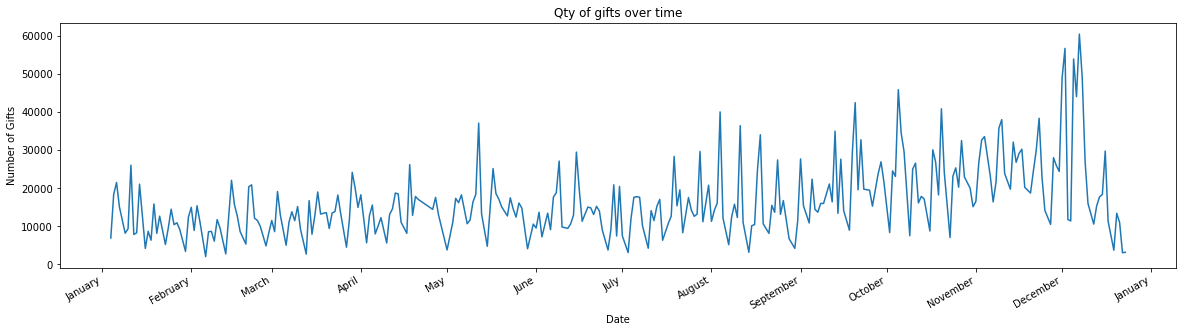

In [379]:
import matplotlib.dates as mdates


plt.figure(figsize=(20,5))
plt.plot(qty_date['InvoiceDay'],qty_date['Quantity'])
plt.title('Qty of gifts over time')
plt.xlabel('Date')
plt.ylabel('Number of Gifts')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.gcf().autofmt_xdate() # Rotation
plt.show()
# plt.show()

In [380]:
qty_date['InvoiceDay'] = qty_date['InvoiceDay'].apply(lambda x: x.strftime('%B-%d'))
qty_date.sort_values(by=['Quantity'], ascending=False).head()

,InvoiceDay,Quantity
283,December-07,60513
278,December-02,56755
281,December-05,53980
284,December-08,49059
277,December-01,49044


<div class="alert alert-success"> 
We can notice a trend of number of gifts increasing towards the second half after October in preparation for the holiday season.
And the trend finally peaks in early December when people have their Christmas shopping
    <br/>
    And, the top 5 days with max quantity purchased are December 7,2,5,8,11.
</div>


### Get Most popular Products

In [381]:
#Get number of unique products
df['Description'].nunique()

3874

In [413]:
#Remove the outlier invoice
df_product = df[df['Quantity']<70000]

#Group by product and sum up quantity
df_product = df_product.groupby(['Description'])['Quantity'].sum().reset_index().sort_values(by=['Quantity'], ascending=False)
df_product.head()

,Description,Quantity
3782,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
1761,JUMBO BAG RED RETROSPOT,46181
3694,WHITE HANGING HEART T-LIGHT HOLDER,36725
216,ASSORTED COLOUR BIRD ORNAMENT,35362
2267,PACK OF 72 RETROSPOT CAKE CASES,33693


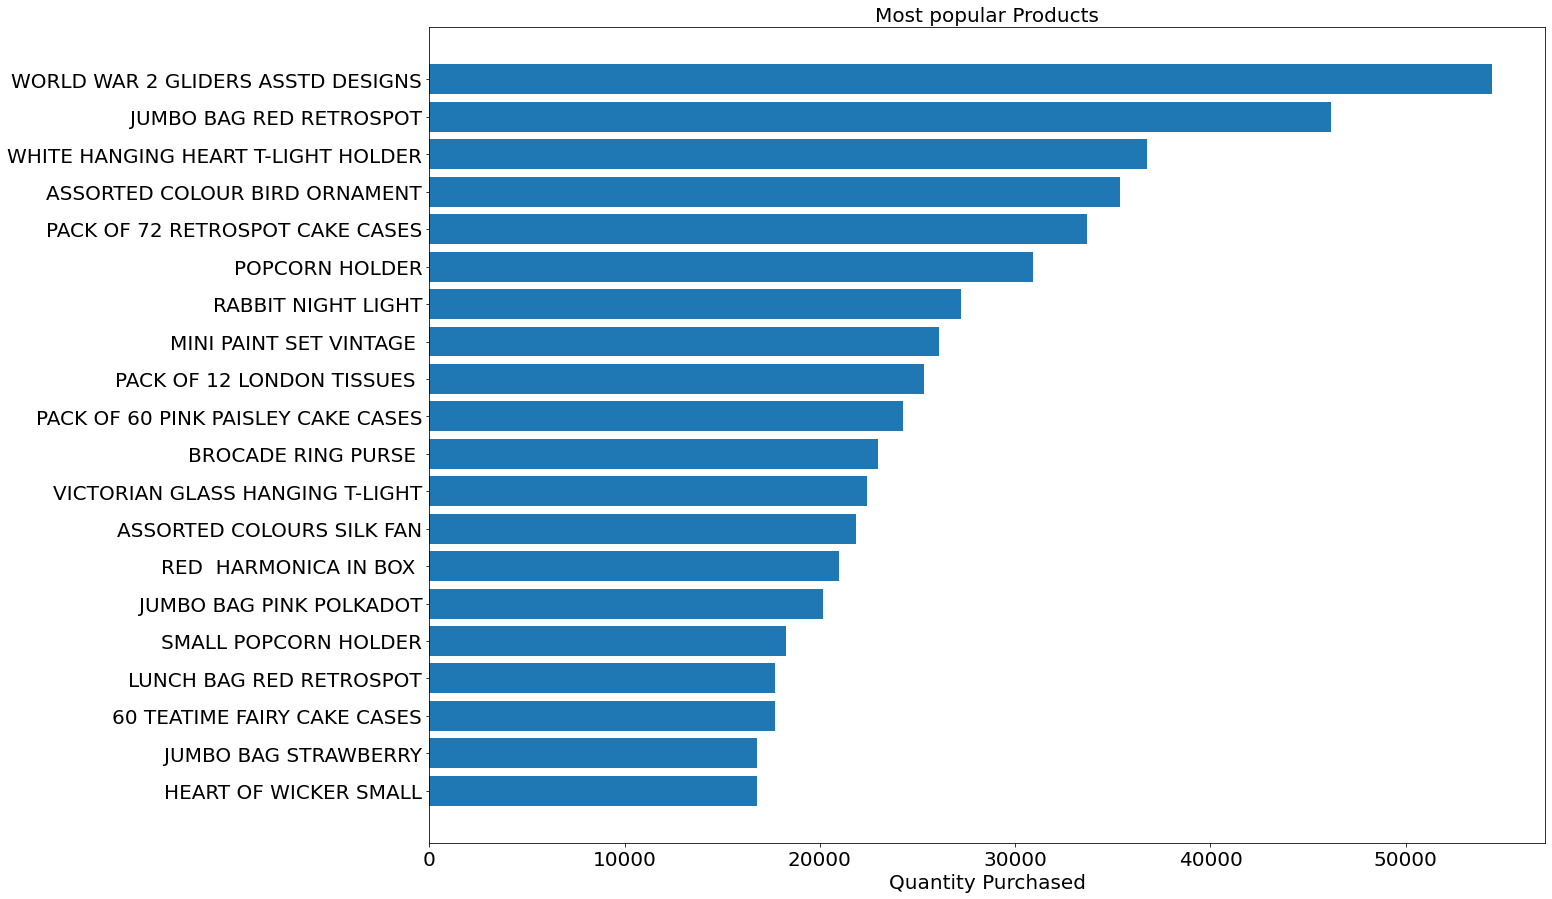

In [421]:
#Plot top 20 only. Reverse order because we want to show descending in barh
df_product_plot = df_product.iloc[:20][::-1]

plt.figure(figsize=(20, 15))
plt.barh(df_product_plot['Description'], df_product_plot['Quantity'])
plt.title("Most popular Products", fontsize=20)
plt.xlabel("Quantity Purchased", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
    
plt.show()

Therefore, `WORLD WAR 2 GLIDERS ASSTD DESIGNS` is the most popular products purchased 

### Get most loyal customers

In [415]:
#Get number of customers
df['CustomerID'].nunique()

4335

In [426]:
#Group by product and sum up quantity
df_customer = df.groupby(['CustomerID'])['InvoiceNo'].nunique().reset_index().sort_values(by=['InvoiceNo'], ascending=False)
df_customer['CustomerID'] = df_customer['CustomerID'].astype(int).astype(str)
df_customer.head()

,CustomerID,InvoiceNo
326,12748,206
1879,14911,199
4008,17841,124
562,13089,97
2176,15311,91


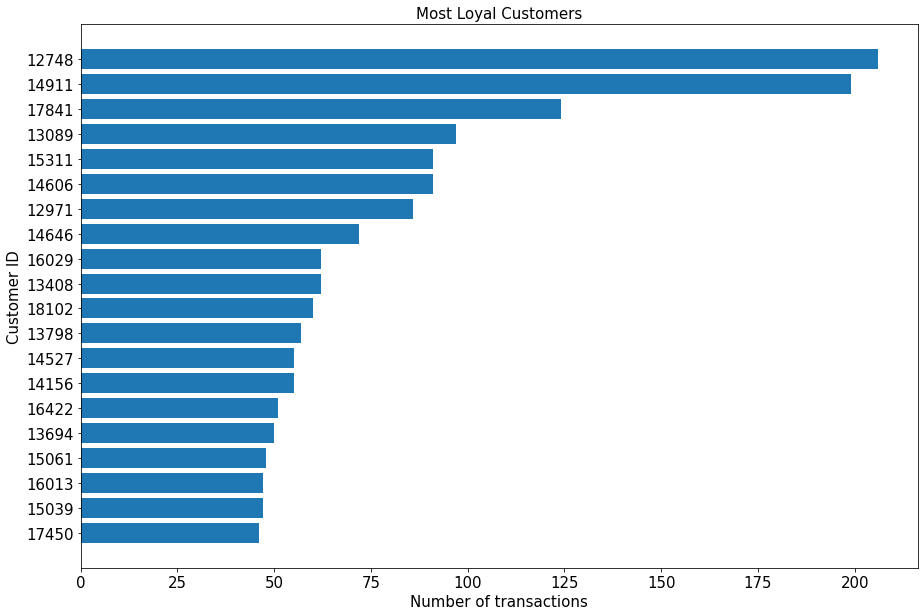

In [433]:
#Plot top 20 only. Reverse order because we want to show descending in barh
df_customer_plot = df_customer.iloc[:20][::-1]

plt.figure(figsize=(15, 10))
plt.barh(df_customer_plot['CustomerID'], df_customer_plot['InvoiceNo'])
plt.title("Most Loyal Customers", fontsize=15)
plt.xlabel("Number of transactions", fontsize=15)
plt.ylabel("Customer ID", fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.show()

## Market Basket Analysis